In [43]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END

In [44]:
class AgentState (TypedDict):
    num1:int
    num2:int
    num3:int
    num4:int
    oper1:str
    oper2:str
    result1:int
    result2:int

In [ ]:
def add1(state :AgentState) ->AgentState:
    state['result1']=state['num1']+state['num2']
    return state

def sub1(state :AgentState) ->AgentState:
    state['result1']=state['num1']-state['num2']
    return state

def add2(state :AgentState) -> AgentState:
    state['result2']=state['num3']+state['num4']
    return state

def sub2(state :AgentState) ->AgentState:
    state['result2']=state['num3']-state['num4']
    return state

def router1(state :AgentState) ->AgentState :
    """This switches between the nodes"""
    if state['oper1'] =='+':
        return "add"
    else :
        return "Sub"

def router2 (state :AgentState) ->AgentState :
    """This switches between the nodes"""
    if state['oper2'] =='+':
        return "add"
    else :
        return "Sub"

In [46]:
graph= StateGraph(AgentState)
graph.add_node("addition1",add1)
graph.add_node("subtract1",sub1)
graph.add_node('router1',lambda state : state)
graph.add_node('router2',lambda state : state)

graph.add_conditional_edges(
    'router1',
    router1,
    {
        "add":"addition1",
        "Sub" :'subtract1'
    }
)
graph.add_edge(START,'router1')
graph.add_edge("addition1",'router2')
graph.add_edge("subtract1",'router2')

graph.add_node("addition2",add2)
graph.add_node("subtract2",sub2)

graph.add_conditional_edges(
    'router2',
    router2,
    {
        'add':"addition2",
        'Sub':'subtract2'
    }
)

graph.add_edge("addition2",END)
graph.add_edge('subtract2',END)
model=graph.compile()

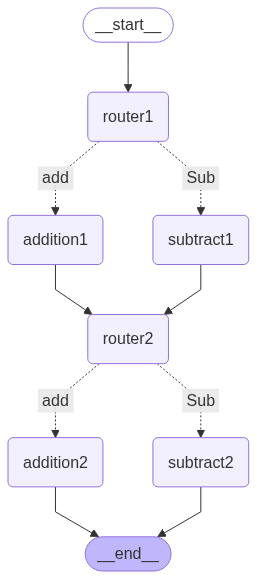

In [47]:
from IPython.display import Image,display
display(Image(model.get_graph().draw_mermaid_png()))

In [48]:
rslt=model.invoke({'num1':10,'num2':5,'oper1':'+','num3':3,'num4':7,'oper2':'+'})
print(rslt)

{'num1': 10, 'num2': 5, 'num3': 3, 'num4': 7, 'oper1': '+', 'oper2': '+', 'result1': 15, 'result2': 10}
